# Chapter 18: Images

Using pixmap images only with an emphasis on automation... efficient analytical pipelines

## Pixmaps

* can be stored as .jpeg, .png, or .gif
* imagined as an array of different color values
* pixel #1 (top left corner) =  array position (0,0)
* common color models used:
    * greyscale
    * RGB
    * RGBA
    * CMYK
    * HSV
* in order to interpret image data correctly we must know what the maximum value is 
* image values are not normally stored as values from 0.0-1.0, instead they are strored as 8bit integers for memeory saving purposes
    * i.e. RGB is stored as a red (R) 8bit-int, same with green (G), and blue(B). This means that the image is described as 24bit, 8 from each.
    * each color can be thought of as seperate layers, or **channels**
    

## Image Manipulation

* when maniuplating the data it is important to keep the original data untouched. 
* Necessary to maniuplate the data and assign it to a new variable in order to preserve the original unmanipulated data within the first variable 
* use the __Python Imaging Library__ (PIL or Pillow) and the Python wrapper to __Imagemagick__

## Basic Image Operations
* use PIL to get ahold of the pixmap data from the images files themselves.
* necessary to convert images between file types in order to work with different programs
* we can also improve the storage efficiency by converting to a different file type
    * i.e. going from an uncompressed TIFF to JPEG

## Python Imaging Library

(326, 329)
RGB


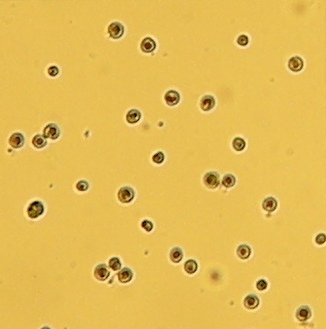

In [1]:
# import library and image module to construct Image class
from PIL import Image

# .open() function can be called on the Image object
# a method to load a file from disk and make an Image object
# file type is guessed by the PIL library when loading image
img = Image.open('examples/Cells.jpg')

# once we have the object we can access its properties
print(img.size)
print(img.mode)

# can also use .show() to display the image on the screen
img

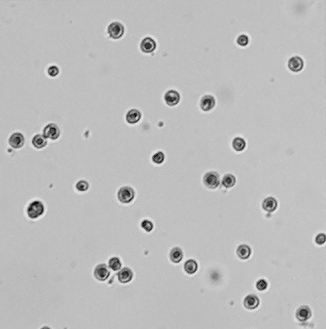

In [2]:
# can save image as different file formats
# JPEG gives the smallest file size, but will lose data quality (lossy compression)
# PNG will preserve all data but file will be larger (lossless compression)
#img.save('Cells.png', 'PNG')

# if we need the pixel values described in a different way..
# we can use the .convert() function before saving the image

# img.convert('CMYK')  # Cyan, Magenta, Yellow, blacK
img.convert('L') # Luminance = greyscale

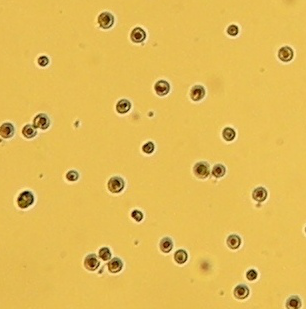

In [3]:
#.crop() chops edges off of pixmap
# size values must be passed as arguments in a tuple
# left, top, right and bottom edges
w, h = img.size
img.crop((10, 10, w-10, h-10))


In [4]:
# rotation 
# specify the angle of rotation in degrees
# save pixmap as image
img1 = img.rotate(270)
img1.save('examples/CellsAdj.png', 'PNG')

In [5]:
# .resize(), gives back new image, preserving the one passed in
# combine the original pixels together to make the new array
# also supply the resizing method 

img2 = img.resize((int(w/2), int(h/2)), Image.ANTIALIAS)
img2.save('examples/CellsHalfSize.png', 'PNG')

In [6]:
# resizing can also be done by making thumbnails
# thumbnail() changes the image inplace so a copy must made to preserve original img
img2 = img.copy()
img2.thumbnail((50, 50), Image.ANTIALIAS)
img2.save('examples/CellsThumb.png', 'PNG')

## Using NumPy for images

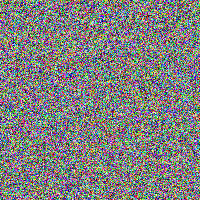

In [9]:
# place image into numeric array
# array size will be the same as the image 
# array element for each pixel

# if image is greyscale we only need an array of one element deep
# array element represents the brightness
# RGB: 3 elements deep, a layer = a channel
# pixel = vector of [ r, g, b ]

# imports
from numpy import array, dot, dstack, ones, random, uint8, zeros

# create array of specified size to hold image data
# RGB so depth is 3
h = 200
w = 200
d = 3 

pixmap = zeros((h, w, d)) # black
pixmap = ones((h, w, d)) # white
pixmap = random.random((h, w, d)) # random colors
pixmap *= 255 #RGB will be 0-255 so converts to RGB

# convert data type to uint8
# will be directly interpreted by PIL
# create function for conversion 

def pixmapToImage(pixmap, mode='RGB'):
    
    if pixmap.max() > 255:
        pixmap *= 255.0 / pixmap.max()
    
    pixmap = array(pixmap, uint8)
    img = Image.fromarray(pixmap, mode)
    
    return img

img1 = pixmapToImage(pixmap)
img1



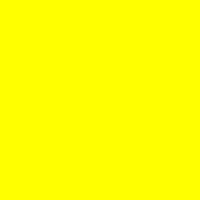

In [10]:
# build images by combining separate matrices for each channel
# create all yellow image... max red and max green 
size = (h,w)

redMatrix = ones(size)
greenMatrix = ones(size)
blueMatrix = zeros(size)

pixmap = dstack([redMatrix, greenMatrix, blueMatrix])
pixmap *= 255

img1 = pixmapToImage(pixmap)
img1

In [11]:
def imageToPixmapRGB(img):
    
    img2 = img.convert('RGB')
    w, h = img2.size
    data = img2.getdata()
    pixmap = array(data, uint8)
    pixmap = pixmap.reshape((h,w,3))
    
    return pixmap

img = Image.open('examples/CellNucleusRedGreen.png')
pixmap = imageToPixmapRGB(img)

In [12]:
# scipy example
#from scipy import ndimage
#
#
#pixmap = ndimage.imread('examples/CellNucleusRedGreen.png')
#pixmap = pixmap[:,:,:3] # slice of color layers
#
# define color transformation matrix
# the three rows dictate hoe to modify red green and blue
# [r,g,b] values of each row specify what the color will be
#transform = array([[1.0, 1.0, 0.0], # red channel will be equal red and green (yellow)
#                  [0.0, 0.0, 1.0], # green channel will be blue
#                  [0.0, 0.0, 0.0]]) # all other blue is removed 
#
#pixmap2 = dot(pixmap, transform) # apply transformation matrix 
#
#img2 = pixmapToImage(pixmap2)
#img2.show()
#
#pixmap = array(pixmap, float)
#pixmap /= 255.0
#pixmap = pixmap ** 2
#pixmap = array(255*pixmap, uint8)
#img2 = pixmapToImage(pixmap)
#img2.show()


## Adjustments and filters

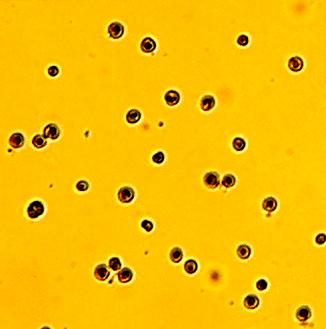

In [13]:
# ImageEnhance module
from PIL import Image, ImageEnhance
img = Image.open('examples/Cells.jpg')

# change the contrast of image
# create processing object for image
# call object with parameter adjustments made
# increase contrast by .enchance(> 1.0)
processObj = ImageEnhance.Contrast(img)
img2 = processObj.enhance(2.0)
img2


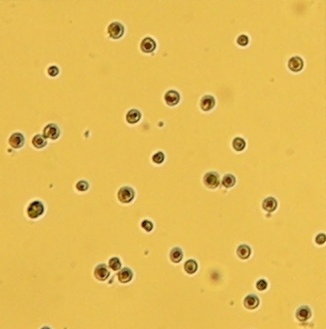

In [14]:
# adjusting sharpness...
# changing the local contrast at the edges within an image

processObj = ImageEnhance.Sharpness(img)

img2Sharp = processObj.enhance(4.0)

imgBlur = processObj.enhance(0.5)

imgBlur
#img2Sharp

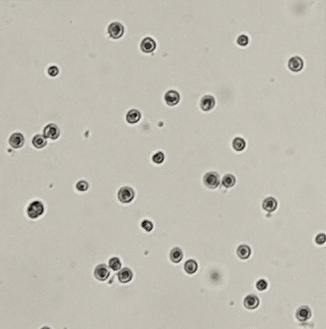

In [15]:
# adjust brightness and colorfulness

imgBright = ImageEnhance.Brightness(img).enhance(0.5)
imgDull = ImageEnhance.Color(img).enhance(0.1)

#imgBright
imgDull

## Intensity adjustments using Numpy


In [16]:
from numpy import array, dstack, exp, mgrid, sqrt, uint8
# mgrid: quickly creates arrays that can be used together to form grid of row and column numbers

# function to control the brightness by gamma correction
# if gamma is greater than one the image will look darker, below one brighter
# preserves extremes
def gammaAdjust(pixmap, gamma=1.0):
    
    pixmap = array(pixmap, float)/255.0 # scale (0.0-1.0)
    pixmap = pixmap ** gamma
    pixmap *= 255
    
    return pixmap

# function to normailise pixmap
# i.e. grey image, with no black or white
#    the darkest shade moved to black (0)
#    the brightest to white (255).
def normalisePixmap(pixmap):
    
    pixmap -= pixmap.min() # set min value to zero
    maxVal = pixmap.max() # set max 
    
    if maxVal > 0:
        pixmap *= 255.0 / maxVal
    
    return pixmap

# function to set min and max brightness of image by clipping
# only adjusts the edges of the brightness not the middle
# takes in pixmap and two threshold values
def clipPixmapValues(pixmap, minimum=0, maximum=255):
    
    pixmap2 = pixmap.copy()
    grey = pixmap2.mean(axis=2)
    
    boolArray = grey < minimum
    indices = boolArray.nonzero()
    pixmap2[indices] = minimum
    
    boolArray = grey > maximum
    indices = boolArray.nonzero()
    pixmap2[indices] = maximum
    
    return pixmap2

# can also clip by np array function 
# minimum, maximum = 64, 192
# pixmap2 = pixmap.clip(minimum, maximum)

# function to view pixel values distrubution 
# create grey pixmap of brightness is made by averaging over the depth (color) axis
# flatten to 1d array and convert to py list
# make histogram w/ 256 bits
def showHistogram(pixmap):
    
    grey = pixmap.mean(axis=2)
    values = grey.flatten().tolist()
    
    from matplotlib import pyplot
    
    pyplot.hist(values, 256)
    pyplot.show()


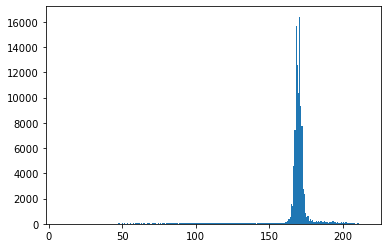

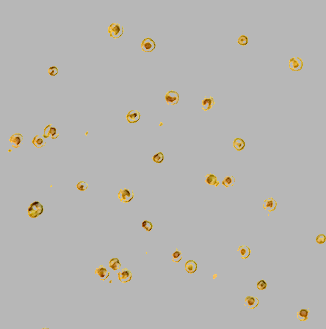

In [17]:
from PIL import Image

img = Image.open('examples/Cells.jpg')
pixmap = imageToPixmapRGB(img)

showHistogram(pixmap)

pixmap2 = gammaAdjust(pixmap, 0.7)
pixmap3 = clipPixmapValues(pixmap2, 0, 145)
pixmap4 = normalisePixmap(pixmap3)

img1 = pixmapToImage(pixmap4, 'RGB')
img1

## Convolving image filters

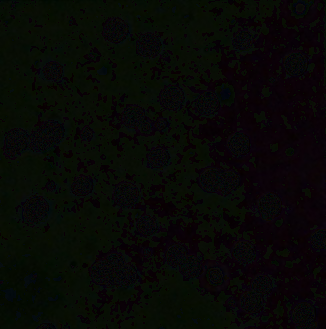

In [19]:
# a filter is a way of transforming an image, 
# combining original pixel values together to make new values

# convolution operation takes two arrays, axes must be the same
# for a 3 layer image, colour components are convolved 

from scipy import signal
from scipy import ndimage

def convolveMatrix2D(pixmap, matrix, mode='reflect'):
    
    matrix = array(matrix)
    
    if matrix.ndim != 2:
        raise Exception('Convolution matrix must be 2D')
        
    if pixmap.ndim not in (2,3):
        raise Exception('Pixmap must be 2D or 3D')
        
    if pixmap.ndim == 2:
        pixmap2 = ndimage.convolve(pixmap, matrix, mode=mode)
        
    else:
        layers = []
        for i in range(3):
            layer = ndimage.convolve(pixmap[:,:,i], matrix, mode=mode)
            layers.append(layer)
            
        pixmap2 = dstack(layers)
        
    return pixmap2


# matrix to filter the image by 
matrix = [[1, 1, 1],
          [1, 8, 1],
          [1, 1, 1]]

pixmapBlur = convolveMatrix2D(pixmap, matrix)

# to view results we must normalise the image
# pixmap was convolved by increasing intensity values by a factor of 16
# 8 from the original intensity plus 1 from each of the 8 neighboring pixels in matrix
pixmapBlur =  pixmapBlur / array(matrix).sum()
imgBlur = pixmapToImage(pixmapBlur)
imgBlur


## Sharpen, blur and edge-detection filters

In [20]:
# function to sharpen image with filter
def sharpenPixmap(pixmap):
    
    # uses filter matrix to accentuate diff between pixels
    matrix = [[-1,-1,-1],
             [-1, 8, -1],
             [-1,-1,-1]]
    
    grey = pixmap.mean(axis=2)
    pixmapEdge = convolveMatrix2D(grey, matrix)
    normalisePixmap(pixmapEdge)
    
    
    pixmapEdge -= pixmapEdge.mean()
    pixmapEdge = dstack([pixmapEdge, pixmapEdge, pixmapEdge])
    
    pixmapSharp = pixmap + pixmapEdge # create sharp pixmap
    pixmapSharp = pixmapSharp.clip(0, 255)
    
    return pixmapSharp

# Gaussian filter
# blurs pizels with a weighting that has a bell curve 
def gaussFilter(pixmap, r=2, sigma=1.4):
    
    x, y = mgrid[-r:r+1, -r:r+1]
    
    s2 = 2.0 * sigma * sigma
    
    x2 = x * x / s2
    y2 = y * y / s2
    
    # define filter
    matrix = exp( -(x2 + y2))
    matrix = matrix / matrix.sum() 
    
    # apply filter to pixmap using convolution to each color component
    pixmap2 = convolveMatrix2D(pixmap, matrix)
    
    return pixmap2


# Sobel filter
# used for edge detection

def sobelFilter(pixmap): 
    
    matrix = array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])
    
    # filter matrix is applied to the grey average of the input pixmap
    grey = pixmap.mean(axis=2)
    edgeX = convolveMatrix2D(grey, matrix)
    edgeY = convolveMatrix2D(grey, matrix.T)
    
    # final pixmap of edges is then a combination of horizontal and vertical edge maps
    pixmap2 = sqrt(edgeX * edgeX + edgeY * edgeY)
    normalisePixmap(pixmap2) # Put min, max at 0, 255
    
    return pixmap2
    



In [21]:
# filter functions test
from PIL import Image
img = Image.open('examples/Cells.jpg')
pixmap = imageToPixmapRGB(img)

pixmap = sharpenPixmap(pixmap)
pixmapToImage(pixmap).show()

pixmap = gaussFilter(pixmap)
pixmapGrey = sobelFilter(pixmap)
pixmapToImage(pixmapGrey, mode='L').show()


## Feature detection

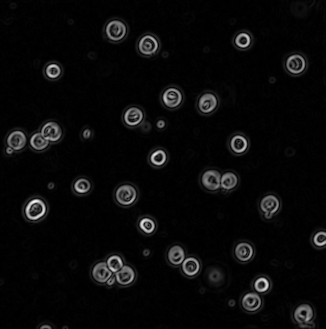

In [22]:
# Goal is to count the number of cells in an image

from PIL import Image

img = Image.open('examples/Cells.jpg')

pixmap = imageToPixmapRGB(img) # create pixmap
pixmap2 = gaussFilter(pixmap) # blur pixmap 
pixmap2 = sobelFilter(pixmap2) # edge detection filter

pixmap2 = normalisePixmap(pixmap2) # normalise pixmap, greyscale

img2 = pixmapToImage(pixmap2, mode='L')
img2

In [25]:
# function to cluster bright pixels so we can identify blobs


def getNeighbours(point, points): # identifies neighbors
    
    i, j = point
    check = [(i-1, j), (i+1, j),
            (i, j-1), (i, j+1)]
   
    neighbours = [p for p in check if p in points]
    
    return neighbours

# main clustering function
# list of lists is returned 

def brightPixelCluster(pixmap, threshold=60): 
    
    boolArray = pixmap > threshold
    indices = array(boolArray.nonzero()).T
    points = set([tuple(point) for point in indices])
    clusters = []
    pool = set(points)
    clustered = set()
    
    while pool:
        pointA = pool.pop()
        neighbours = getNeighbours(pointA, points)
        cluster = []
        cluster.append(pointA)
        clustered.add(pointA)
        pool2 = set(neighbours)
        
        while pool2:
            pointB = pool2.pop()
            if pointB in pool:
                pool.remove(pointB)
                neighbours2 = getNeighbours(pointB, points)
                pool2.update(neighbours2)
                cluster.append(pointB)
        
        clusters.append(cluster)
        
    return clusters


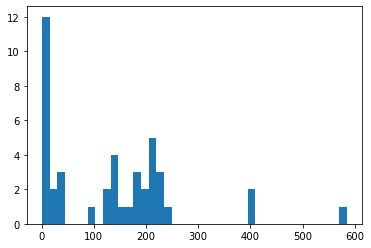

In [26]:
clusters = brightPixelCluster(pixmap2)
sizes = [len(c) for c in clusters]
from matplotlib import pyplot
plot = pyplot.hist(sizes, 40)



Found 17 small blobs
Found 23 medium blobs
Found 3 big blobs
Estimated number of cells: 30


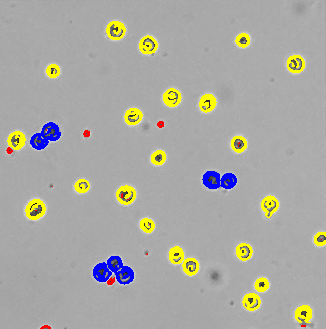

In [31]:
smallBlobs = []
mediumBlobs = []
bigBlobs = []

for cluster in clusters:
    
    n = len(cluster)

    if n < 80:
        smallBlobs.append(cluster)
    elif n < 320:
        mediumBlobs.append(cluster)
    else:
        bigBlobs.append(cluster)

print('Found %d small blobs' % len(smallBlobs))
print('Found %d medium blobs' % len(mediumBlobs))
print('Found %d big blobs' % len(bigBlobs))

grey = pixmap.mean(axis=2)
colorMap = dstack([grey, grey, grey])

colors = [(255, 0, 0), (255, 255, 0), (0, 0, 255)]
categories = [smallBlobs, mediumBlobs, bigBlobs]

for i, blobs in enumerate(categories):
    color = colors[i]

    for cluster in blobs:
        x, y = zip(*cluster)

        colorMap[x,y] = color


#Image.fromarray(array(colorMap, uint8), 'RGB').show()
img = Image.fromarray(array(colorMap, uint8), 'RGB')

numCells = len(mediumBlobs)  # initial guess
cellAreas = [len(blob) for blob in mediumBlobs]
meanCellArea = sum(cellAreas) / float(numCells)

for blob in bigBlobs:
    numCells += int( len(blob) // meanCellArea )

print('Estimated number of cells: %d' %  numCells)
img

# Week 6 Assignment

## Image Operations

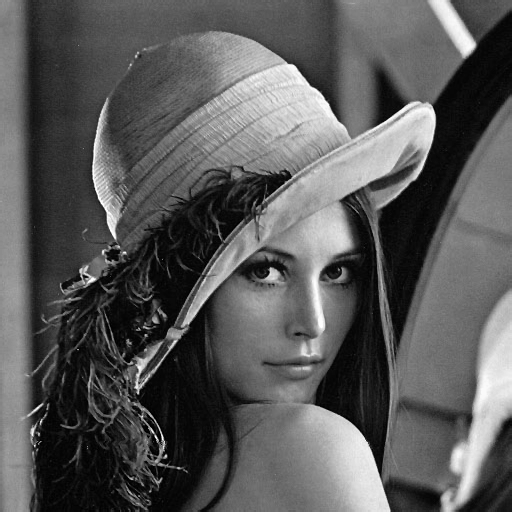

In [33]:
# Code for importing an image (Lena.png, provided)

# import library and image module to construct Image class
from PIL import Image
img = Image.open('Lena.png')
img

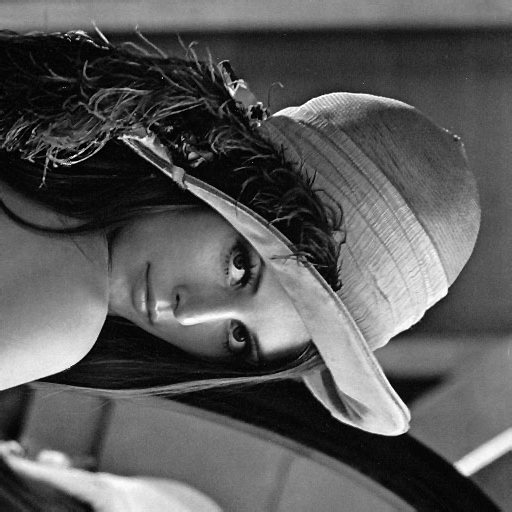

In [34]:
# Code that rotates the imported image by 270 degrees
img1 = img.rotate(270)
img1

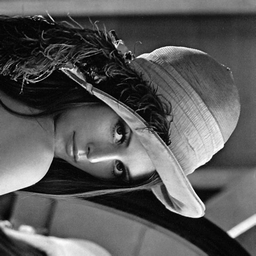

In [35]:
# Code that resizes the rotated image to half the size
w, h = img1.size # get image size 

img2 = img1.resize((int(w/2), int(h/2)), Image.ANTIALIAS) # resize image (half the size)

img2



In [36]:
# Code that saves the resulting image

img2.save('LenaAdj.png', 'PNG')

## Adjustments and Filters

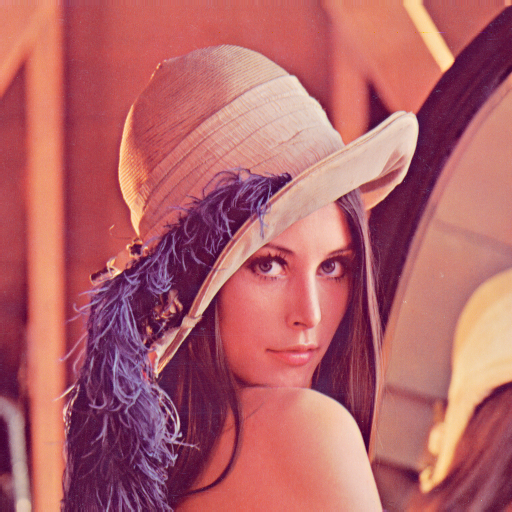

In [55]:
# Code for importing three separate matrices (Lenas - provided) for constructing a color image of the RGB type

# imports
from numpy import array, dot, dstack, ones, random, uint8, zeros

def imageToPixmapRGB(img):
    
    img2 = img.convert('RGB')
    w, h = img2.size
    data = img2.getdata()
    pixmap = array(data, uint8)
    pixmap = pixmap.reshape((h,w,3))
    
    return pixmap

def pixmapToImage(pixmap, mode='RGB'):
    
    if pixmap.max() > 255:
        pixmap *= 255.0 / pixmap.max()
    
    pixmap = array(pixmap, uint8)
    img = Image.fromarray(pixmap, mode)
    
    return img


imgR = Image.open('LenaRed.png')
imgG = Image.open('LenaGreen.png')
imgB = Image.open('LenaBlue.png')
img_combined = Image.merge('RGB',(imgR.getchannel('R'),imgG.getchannel('G'),imgB.getchannel('B')))
img_combined.save('LenaRGB.jpg')
img_combined

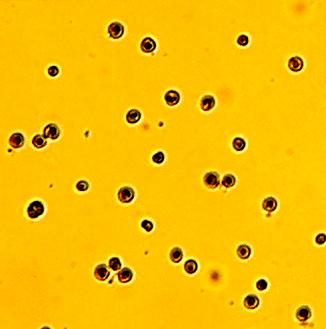

In [56]:
# Code that does "contrast change" on the color image (with an argument of 2.0) (use 'examples/Cells.jpg' for remaining code

# Need ImageEnhance module
from PIL import Image, ImageEnhance

img = Image.open('examples/Cells.jpg')

# change the contrast of image by 2.0
processObj = ImageEnhance.Contrast(img)
img2 = processObj.enhance(2.0)
img2


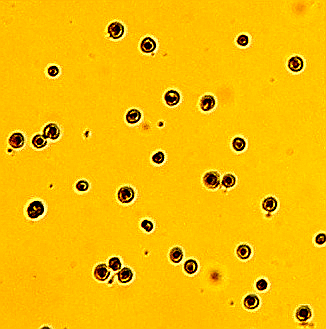

In [57]:
# Code that "sharpens" the contrast-changed image (with an argument of 4.0)

processObj = ImageEnhance.Sharpness(img2)

img2Sharp = processObj.enhance(4.0)
img2Sharp

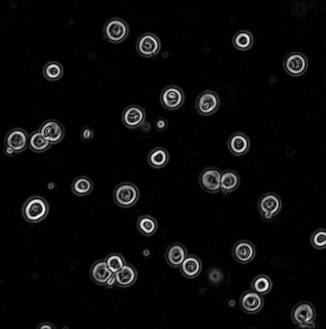

In [62]:
#Code for "edge-detection" (with the average brightness of 127 (out of the range from 0 through 255))


pixmap = imageToPixmapRGB(img2Sharp) # create pixmap
pixmap2 = gaussFilter(pixmap) # blur pixmap 
pixmap2 = sobelFilter(pixmap2) # edge detection filter

pixmap2 = normalisePixmap(pixmap2) # normalise pixmap, greyscale

img3 = pixmapToImage(pixmap2, mode='L')
img3

